# Get the first member automatically [#266](https://github.com/intake/intake-esm/issues/266)
conda env: `phd_v3`

In [1]:
!conda list intake

# packages in environment at /home/lalandmi/miniconda3/envs/phd_v3:
#
# Name                    Version                   Build  Channel
intake                    0.6.0                      py_0    conda-forge
intake-esm                2020.6.11                  py_0    conda-forge


In [44]:
import intake
import pprint

In [3]:
url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
col = intake.open_esm_datastore(url)
print(type(col))
col

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'intake_esm.core.esm_datastore'>


,unique
activity_id,15
institution_id,33
source_id,76
experiment_id,105
member_id,204
table_id,29
variable_id,373
grid_label,10
zstore,282265
dcpp_init_year,60


In [4]:
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,AerChemMIP,AS-RCEC,TaiESM1,histSST,r1i1p1f1,AERmon,od550aer,gn,gs://cmip6/AerChemMIP/AS-RCEC/TaiESM1/histSST/...,NaN,20200310
1,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrbc,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20190718
2,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrdust,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20191127
3,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmroa,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20190809
4,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrso4,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20191127


In [5]:
query = dict(
    experiment_id=["historical"],
    table_id="Amon",
    variable_id="tas",
    member_id="r1i1p1f1",
)

In [6]:
cat = col.search(**query)

In [7]:
cat.df.groupby("source_id")[
    ["experiment_id", "variable_id", "table_id", "member_id"]
].nunique()

,experiment_id,variable_id,table_id,member_id
source_id,,,,
ACCESS-CM2,1,1,1,1
ACCESS-ESM1-5,1,1,1,1
AWI-CM-1-1-MR,1,1,1,1
AWI-ESM-1-1-LR,1,1,1,1
BCC-CSM2-MR,1,1,1,1
BCC-ESM1,1,1,1,1
CAMS-CSM1-0,1,1,1,1
CAS-ESM2-0,1,1,1,1
CESM2,1,1,1,1


## andersy005 comment

In [8]:
query = dict(
    experiment_id=["historical"],
    table_id="Amon",
    variable_id="tas",
    member_id="r1i1p1f*",
)

In [9]:
cat = col.search(**query)

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/intake_esm/core.py:705: UserWarning: Query returned zero results.
  warn(message)


In [10]:
cat.df.groupby("source_id")[
    ["experiment_id", "variable_id", "table_id", "member_id"]
].nunique()

,experiment_id,variable_id,table_id,member_id
source_id,,,,


## Solution
https://github.com/intake/intake-esm/issues/266#issuecomment-671468165

In [11]:
url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
col = intake.open_esm_datastore(url)
col

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,unique
activity_id,15
institution_id,33
source_id,76
experiment_id,105
member_id,204
table_id,29
variable_id,373
grid_label,10
zstore,282265
dcpp_init_year,60


In [14]:
cat = col.search(experiment_id="historical", table_id="Amon", variable_id="tas")
cat

,unique
activity_id,1
institution_id,29
source_id,52
experiment_id,1
member_id,191
table_id,1
variable_id,1
grid_label,3
zstore,532
dcpp_init_year,0


In [26]:
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,AS-RCEC,TaiESM1,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/AS-RCEC/TaiESM1/historical/r1i...,NaN,20200218
1,CMIP,AWI,AWI-CM-1-1-MR,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/AWI/AWI-CM-1-1-MR/historical/r...,NaN,20191015
2,CMIP,AWI,AWI-CM-1-1-MR,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/AWI/AWI-CM-1-1-MR/historical/r...,NaN,20191015
3,CMIP,AWI,AWI-CM-1-1-MR,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/AWI/AWI-CM-1-1-MR/historical/r...,NaN,20191015
4,CMIP,AWI,AWI-CM-1-1-MR,historical,r4i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/AWI/AWI-CM-1-1-MR/historical/r...,NaN,20191015
...,...,...,...,...,...,...,...,...,...,...,...
527,CMIP,THU,CIESM,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP/THU/CIESM/historical/r1i1p1f1/...,NaN,20191228
528,CMIP,THU,CIESM,historical,r2i1p1f1,Amon,tas,gr,gs://cmip6/CMIP/THU/CIESM/historical/r2i1p1f1/...,NaN,20191228
529,CMIP,THU,CIESM,historical,r3i1p1f1,Amon,tas,gr,gs://cmip6/CMIP/THU/CIESM/historical/r3i1p1f1/...,NaN,20200417
530,CMIP,UA,MCM-UA-1-0,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/UA/MCM-UA-1-0/historical/r1i1p...,NaN,20190731


In [33]:
grouped = cat.df.groupby(['activity_id', 'institution_id', 'source_id', 'experiment_id', 'table_id', 'grid_label'])
grouped.first()

member_id  \
activity_id institution_id      source_id        experiment_id table_id grid_label               
CMIP        AS-RCEC             TaiESM1          historical    Amon     gn            r1i1p1f1   
            AWI                 AWI-CM-1-1-MR    historical    Amon     gn            r1i1p1f1   
                                AWI-ESM-1-1-LR   historical    Amon     gn            r1i1p1f1   
            BCC                 BCC-CSM2-MR      historical    Amon     gn            r1i1p1f1   
                                BCC-ESM1         historical    Amon     gn            r1i1p1f1   
            CAMS                CAMS-CSM1-0      historical    Amon     gn            r1i1p1f1   
            CAS                 CAS-ESM2-0       historical    Amon     gn            r1i1p1f1   
                                FGOALS-f3-L      historical    Amon     gr            r1i1p1f1   
                                FGOALS-g3        historical    Amon     gn            r1i1p1f1   
            CCCma               CanESM5          historical    Amon     gn           r10i1p1f1   
                                CanESM5-CanOE    historical    Amon     gn            r1i1p2f1   
            CMCC                CMCC-CM2-SR5     historical    Amon     gn            r1i1p1f1   
            CNRM-CERFACS        CNRM-CM6-1       historical    Amon     gr           r10i1p1f2   
                                CNRM-CM6-1-HR    historical    Amon     gr            r1i1p1f2   
                                CNRM-ESM2-1      historical    Amon     gr           r10i1p1f2   
            CSIRO               ACCESS-ESM1-5    historical    Amon     gn           r10i1p1f1   
            CSIRO-ARCCSS        ACCESS-CM2       historical    Amon     gn            r1i1p1f1   
            E3SM-Project        E3SM-1-0         historical    Amon     gr            r1i1p1f1   
                                E3SM-1-1         historical    Amon     gr            r1i1p1f1   
            EC-Earth-Consortium EC-Earth3        historical    Amon     gr          r101i1p1f1   
                                EC-Earth3-Veg    historical    Amon     gr            r1i1p1f1   
                                EC-Earth3-Veg-LR historical    Amon     gr            r1i1p1f1   
            FIO-QLNM            FIO-ESM-2-0      historical    Amon     gn            r1i1p1f1   
            HAMMOZ-Consortium   MPI-ESM-1-2-HAM  historical    Amon     gn            r1i1p1f1   
            INM                 INM-CM4-8        historical    Amon     gr1           r1i1p1f1   
                                INM-CM5-0        historical    Amon     gr1          r10i1p1f1   
            IPSL                IPSL-CM6A-LR     historical    Amon     gr           r10i1p1f1   
            MIROC               MIROC-ES2L       historical    Amon     gn           r10i1p1f2   
                                MIROC6           historical    Amon     gn           r10i1p1f1   
            MOHC                HadGEM3-GC31-LL  historical    Amon     gn            r1i1p1f3   
                                HadGEM3-GC31-MM  historical    Amon     gn            r1i1p1f3   
                                UKESM1-0-LL      historical    Amon     gn           r10i1p1f2   
            MPI-M               MPI-ESM1-2-HR    historical    Amon     gn           r10i1p1f1   
                                MPI-ESM1-2-LR    historical    Amon     gn           r10i1p1f1   
            MRI                 MRI-ESM2-0       historical    Amon     gn            r1i1p1f1   
            NASA-GISS           GISS-E2-1-G      historical    Amon     gn          r101i1p1f1   
                                GISS-E2-1-G-CC   historical    Amon     gn            r1i1p1f1   
                                GISS-E2-1-H      historical    Amon     gn           r10i1p1f1   
            NCAR                CESM2            historical    Amon     gn           r10i1p1f1   
                                CESM2-FV2        historical    Amon

In [34]:
cat.df = grouped.first().reset_index()
cat

,unique
activity_id,1
institution_id,29
source_id,52
experiment_id,1
table_id,1
grid_label,3
member_id,8
variable_id,1
zstore,53
dcpp_init_year,0


In [35]:
cat.df.head()

,activity_id,institution_id,source_id,experiment_id,table_id,grid_label,member_id,variable_id,zstore,dcpp_init_year,version
0,CMIP,AS-RCEC,TaiESM1,historical,Amon,gn,r1i1p1f1,tas,gs://cmip6/CMIP/AS-RCEC/TaiESM1/historical/r1i...,NaN,20200218
1,CMIP,AWI,AWI-CM-1-1-MR,historical,Amon,gn,r1i1p1f1,tas,gs://cmip6/CMIP/AWI/AWI-CM-1-1-MR/historical/r...,NaN,20191015
2,CMIP,AWI,AWI-ESM-1-1-LR,historical,Amon,gn,r1i1p1f1,tas,gs://cmip6/CMIP/AWI/AWI-ESM-1-1-LR/historical/...,NaN,20200212
3,CMIP,BCC,BCC-CSM2-MR,historical,Amon,gn,r1i1p1f1,tas,gs://cmip6/CMIP/BCC/BCC-CSM2-MR/historical/r1i...,NaN,20181126
4,CMIP,BCC,BCC-ESM1,historical,Amon,gn,r1i1p1f1,tas,gs://cmip6/CMIP/BCC/BCC-ESM1/historical/r1i1p1...,NaN,20181214


In [36]:
[key for key in cat.keys()]

['CMIP.AS-RCEC.TaiESM1.historical.Amon.gn',
 'CMIP.AWI.AWI-CM-1-1-MR.historical.Amon.gn',
 'CMIP.AWI.AWI-ESM-1-1-LR.historical.Amon.gn',
 'CMIP.BCC.BCC-CSM2-MR.historical.Amon.gn',
 'CMIP.BCC.BCC-ESM1.historical.Amon.gn',
 'CMIP.CAMS.CAMS-CSM1-0.historical.Amon.gn',
 'CMIP.CAS.CAS-ESM2-0.historical.Amon.gn',
 'CMIP.CAS.FGOALS-f3-L.historical.Amon.gr',
 'CMIP.CAS.FGOALS-g3.historical.Amon.gn',
 'CMIP.CCCma.CanESM5.historical.Amon.gn',
 'CMIP.CCCma.CanESM5-CanOE.historical.Amon.gn',
 'CMIP.CMCC.CMCC-CM2-SR5.historical.Amon.gn',
 'CMIP.CNRM-CERFACS.CNRM-CM6-1.historical.Amon.gr',
 'CMIP.CNRM-CERFACS.CNRM-CM6-1-HR.historical.Amon.gr',
 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Amon.gr',
 'CMIP.CSIRO.ACCESS-ESM1-5.historical.Amon.gn',
 'CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical.Amon.gn',
 'CMIP.E3SM-Project.E3SM-1-0.historical.Amon.gr',
 'CMIP.E3SM-Project.E3SM-1-1.historical.Amon.gr',
 'CMIP.EC-Earth-Consortium.EC-Earth3.historical.Amon.gr',
 'CMIP.EC-Earth-Consortium.EC-Earth3-Veg.historica

In [37]:
cat.df[['source_id', 'member_id']]

,source_id,member_id
0,TaiESM1,r1i1p1f1
1,AWI-CM-1-1-MR,r1i1p1f1
2,AWI-ESM-1-1-LR,r1i1p1f1
3,BCC-CSM2-MR,r1i1p1f1
4,BCC-ESM1,r1i1p1f1
5,CAMS-CSM1-0,r1i1p1f1
6,CAS-ESM2-0,r1i1p1f1
7,FGOALS-f3-L,r1i1p1f1
8,FGOALS-g3,r1i1p1f1
9,CanESM5,r10i1p1f1


In [41]:
dset_dict = cat.to_dataset_dict(
    zarr_kwargs={"consolidated": True, "decode_times": True}
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [45]:
pprint.pprint(dset_dict.keys())

dict_keys(['CMIP.AS-RCEC.TaiESM1.historical.Amon.gn', 'CMIP.CSIRO.ACCESS-ESM1-5.historical.Amon.gn', 'CMIP.MOHC.UKESM1-0-LL.historical.Amon.gn', 'CMIP.CMCC.CMCC-CM2-SR5.historical.Amon.gn', 'CMIP.INM.INM-CM5-0.historical.Amon.gr1', 'CMIP.EC-Earth-Consortium.EC-Earth3-Veg.historical.Amon.gr', 'CMIP.EC-Earth-Consortium.EC-Earth3.historical.Amon.gr', 'CMIP.NIMS-KMA.UKESM1-0-LL.historical.Amon.gn', 'CMIP.NASA-GISS.GISS-E2-1-G-CC.historical.Amon.gn', 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Amon.gr', 'CMIP.IPSL.IPSL-CM6A-LR.historical.Amon.gr', 'CMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.historical.Amon.gr', 'CMIP.NIMS-KMA.KACE-1-0-G.historical.Amon.gr', 'CMIP.AWI.AWI-ESM-1-1-LR.historical.Amon.gn', 'CMIP.CNRM-CERFACS.CNRM-CM6-1-HR.historical.Amon.gr', 'CMIP.NCAR.CESM2-WACCM-FV2.historical.Amon.gn', 'CMIP.MPI-M.MPI-ESM1-2-HR.historical.Amon.gn', 'CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical.Amon.gn', 'CMIP.CCCma.CanESM5-CanOE.historical.Amon.gn', 'CMIP.CCCma.CanESM5.historical.Amon.gn', 'CMIP.AW

In [58]:
ds = dset_dict[cat.keys()[9]]
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 64, lon: 128, member_id: 1, time: 1980)
Coordinates:
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(64, 2), meta=np.ndarray>
    height     float64 ...
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(128, 2), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * member_id  (member_id) <U9 'r10i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 64, 128), meta=np.ndarray>
Attributes:
    CCCma_model_hash:            55f484f90aff0e32c5a8e92a42c6b9ae7ffe6224
    CCCma_parent_runid:          rc3.1-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his10
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    YMDH_branch_time_in_parent:  5651:01:01:00
    activity_id:                 CMIP
    branch_method:               Spin-up documentation
    branch_time_in_child:        0.0
    branch_time_in_parent:       1387365.0
    cmor_version:                3.4.0
    contact:                     ec.cccma.info-info.ccmac.ec@canada.ca
    creation_date:               2019-04-30T17:40:12Z
    data_specs_version:          01.00.29
    experiment:                  all-forcing simulation of the recent past
    experiment_id:               historical
    external_variables:          areacella
    forcing_index:               1
    frequency:                   mon
    further_info_url:            https://furtherinfo.es-doc.org/CMIP6.CCCma.C...
    grid:                        T63L49 native atmosphere, T63 Linear Gaussia...
    grid_label:                  gn
    history:                     2019-04-30T17:40:12Z ;rewrote data to be con...
    initialization_index:        1
    institution:                 Canadian Centre for Climate Modelling and An...
    institution_id:              CCCma
    license:                     CMIP6 model data produced by The Government ...
    mip_era:                     CMIP6
    nominal_resolution:          500 km
    parent_activity_id:          CMIP
    parent_experiment_id:        piControl
    parent_mip_era:              CMIP6
    parent_source_id:            CanESM5
    parent_time_units:           days since 1850-01-01 0:0:0.0
    parent_variant_label:        r1i1p1f1
    physics_index:               1
    product:                     model-output
    realization_index:           10
    realm:                       atmos
    references:                  Geophysical Model Development Special issue ...
    source:                      CanESM5 (2019): \naerosol: interactive\natmo...
    source_id:                   CanESM5
    source_type:                 AOGCM
    sub_experiment:              none
    sub_experiment_id:           none
    table_id:                    Amon
    table_info:                  Creation Date:(20 February 2019) MD5:374fbe5...
    title:                       CanESM5 output prepared for CMIP6
    tracking_id:                 hdl:21.14100/5ed65f32-a352-4bd1-83a4-c659b4f...
    variable_id:                 tas
    variant_label:               r10i1p1f1
    version:                     v20190429
    status:                      2019-10-25;created;by nhn2@columbia.edu
    intake_esm_varname:          tas
    intake_esm_dataset_key:      CMIP.CCCma.CanESM5.historical.Amon.gn

In [64]:
ds.tas.mean('time').squeeze()

<xarray.DataArray 'tas' (lat: 64, lon: 128)>
dask.array<getitem, shape=(64, 128), dtype=float32, chunksize=(64, 128), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
    member_id  <U9 'r10i1p1f1'

In [65]:
clim = ds.tas.mean('time').squeeze().compute()
clim

<xarray.DataArray 'tas' (lat: 64, lon: 128)>
array([[228.87134, 228.56554, 228.2681 , ..., 229.82709, 229.5032 ,
        229.18378],
       [228.47968, 227.8178 , 227.24965, ..., 231.0382 , 230.09227,
        229.23932],
       [227.7104 , 226.92558, 226.31075, ..., 231.32584, 229.8939 ,
        228.6929 ],
       ...,
       [255.86313, 256.17307, 256.43515, ..., 254.70802, 255.11778,
        255.50911],
       [254.62717, 254.803  , 254.96965, ..., 254.0386 , 254.23825,
        254.43982],
       [254.0827 , 254.12732, 254.16577, ..., 253.94667, 253.99658,
        254.03732]], dtype=float32)
Coordinates:
    height     float64 2.0
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
    member_id  <U9 'r10i1p1f1'

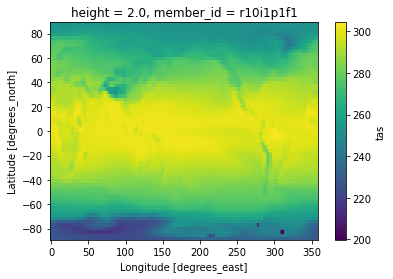

In [66]:
clim.plot()